# I. DATA PREPROCESSING

1. IMPORT LIBRARIES USED AND DATASET 'AIR QUALITY'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn.linear_model

In [2]:
air_df =  pd.read_excel('AirQualityUCI.xlsx')
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


Missing values in the dataset are tagged with -200 value.To facilitate data inspection using broad data descriptions,
I replaced all instances of the value -200 with NaN (not a number) values.

In [3]:
air_df = air_df.replace(-200,np.nan)
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


2. SHAPE OF DATA AND GENERAL DESCRIPTIONS

In [4]:
#Check the number of rows and columns
air_df.shape

(9357, 15)

In [5]:
#Check whether there is missing values as well as the data type of each column.
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

3. DEALING WITH NULL VALUES

In [6]:
air_df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [7]:
for i in ['NMHC(GT)','CO(GT)','NOx(GT)','NO2(GT)']:
    miss_per = air_df[i].isna().sum()/len(air_df[i])*100
    print(f'The {i} sensor has {miss_per:.2f}% of missing data.')


The NMHC(GT) sensor has 90.23% of missing data.
The CO(GT) sensor has 17.99% of missing data.
The NOx(GT) sensor has 17.52% of missing data.
The NO2(GT) sensor has 17.55% of missing data.


Dropping NMHC(GT), CO(GT), NOx(GT) and NO2(GT) sensor data due to the amount of null values if compared to other sensors

In [8]:
air_df = air_df.drop(['NMHC(GT)','CO(GT)','NOx(GT)','NO2(GT)'], axis=1)

In [9]:
#Eliminating rows with NaN values 
air_df = air_df.dropna()
air_df.shape

(8991, 11)

In [10]:
#check nan values again
air_df.isna().sum()

Date             0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

4.DEALING WITH OUTLIERS

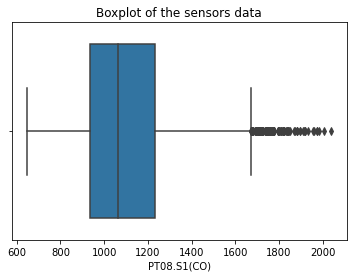

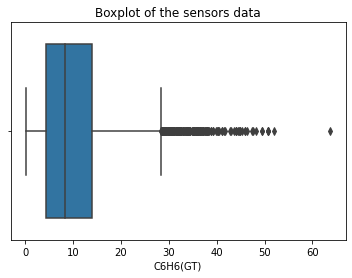

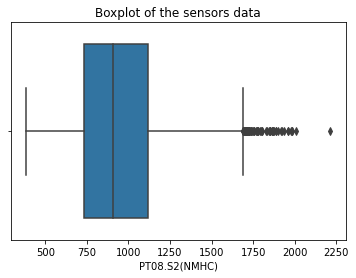

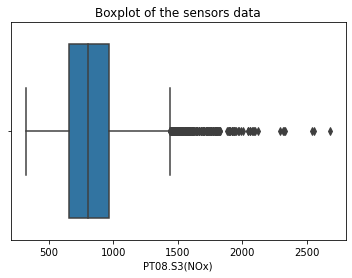

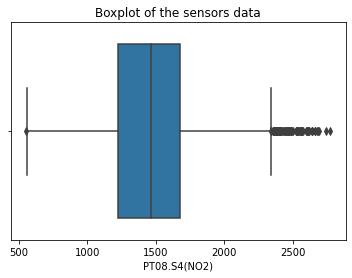

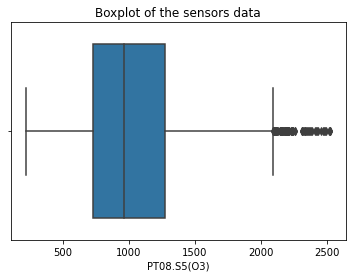

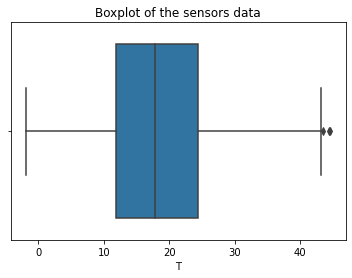

In [11]:
#Box plot
for i in air_df.columns[2:9]:
    sns.boxplot(x=air_df[i])
    plt.title('Boxplot of the sensors data')
    plt.show()

In [12]:
# Exclude the Date and Time columns from outlier detection
air_df1= air_df.drop(['Date', 'Time'], axis=1)
air_df1.shape

(8991, 9)

In [13]:
from scipy import stats
air_df_outliers = air_df1[(np.abs(stats.zscore(air_df1)) < 3).all(axis=1)]
air_df_outliers.shape

(8734, 9)

In [14]:
# Merge the outlier-free subset back into the original DataFrame
air_df = air_df.loc[air_df_outliers.index]

In [15]:
#Create an index array
index=pd.Index([i for i in range(8734)])
#Reset the index of dataframe
air_df.index=index

In [16]:
air_df

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.00,11.881723,1045.50,1056.25,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,1292.25,9.397165,954.75,1173.75,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,1402.00,8.997817,939.25,1140.00,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,1375.50,9.228796,948.25,1092.00,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1272.25,6.518224,835.50,1205.00,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...
8729,2005-04-04,10:00:00,1314.25,13.529605,1101.25,538.50,1374.25,1728.50,21.850,29.250000,0.756824
8730,2005-04-04,11:00:00,1162.50,11.355157,1027.00,603.75,1263.50,1269.00,24.325,23.725000,0.711864
8731,2005-04-04,12:00:00,1142.00,12.374538,1062.50,603.25,1240.75,1092.00,26.900,18.350000,0.640649
8732,2005-04-04,13:00:00,1002.50,9.547187,960.50,701.50,1041.00,769.75,28.325,13.550000,0.513866


# II. EXPLORATION (include Data Visualisation)

In [17]:
#The descriptive statistics for numerical features
air_df.describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000
mean,1093.266678,9.752956,931.681131,829.473075,1448.502252,1012.880696,18.407401,49.122658,1.027717
std,202.101234,6.637053,247.713201,228.779929,328.331381,374.466109,8.871591,17.388973,0.403842
min,666.750000,0.299298,412.000000,345.250000,601.000000,261.500000,-1.900000,9.175000,0.184679
25%,938.000000,4.486628,737.000000,664.250000,1231.750000,734.270833,11.881250,35.550000,0.738708
50%,1061.750000,8.187678,906.875000,806.500000,1461.500000,960.750000,17.850000,49.400000,0.997500
75%,1221.937500,13.658956,1105.500000,964.750000,1664.000000,1256.500000,24.543750,62.500002,1.315327
max,1746.250000,32.357794,1605.250000,1603.750000,2486.250000,2214.000000,44.600000,88.725000,2.231036


In [18]:
df = air_df1= air_df.drop(['Date', 'Time'], axis=1)
df

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.00,11.881723,1045.50,1056.25,1692.00,1267.50,13.600,48.875001,0.757754
1,1292.25,9.397165,954.75,1173.75,1558.75,972.25,13.300,47.700000,0.725487
2,1402.00,8.997817,939.25,1140.00,1554.50,1074.00,11.900,53.975000,0.750239
3,1375.50,9.228796,948.25,1092.00,1583.75,1203.25,11.000,60.000000,0.786713
4,1272.25,6.518224,835.50,1205.00,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...
8729,1314.25,13.529605,1101.25,538.50,1374.25,1728.50,21.850,29.250000,0.756824
8730,1162.50,11.355157,1027.00,603.75,1263.50,1269.00,24.325,23.725000,0.711864
8731,1142.00,12.374538,1062.50,603.25,1240.75,1092.00,26.900,18.350000,0.640649
8732,1002.50,9.547187,960.50,701.50,1041.00,769.75,28.325,13.550000,0.513866


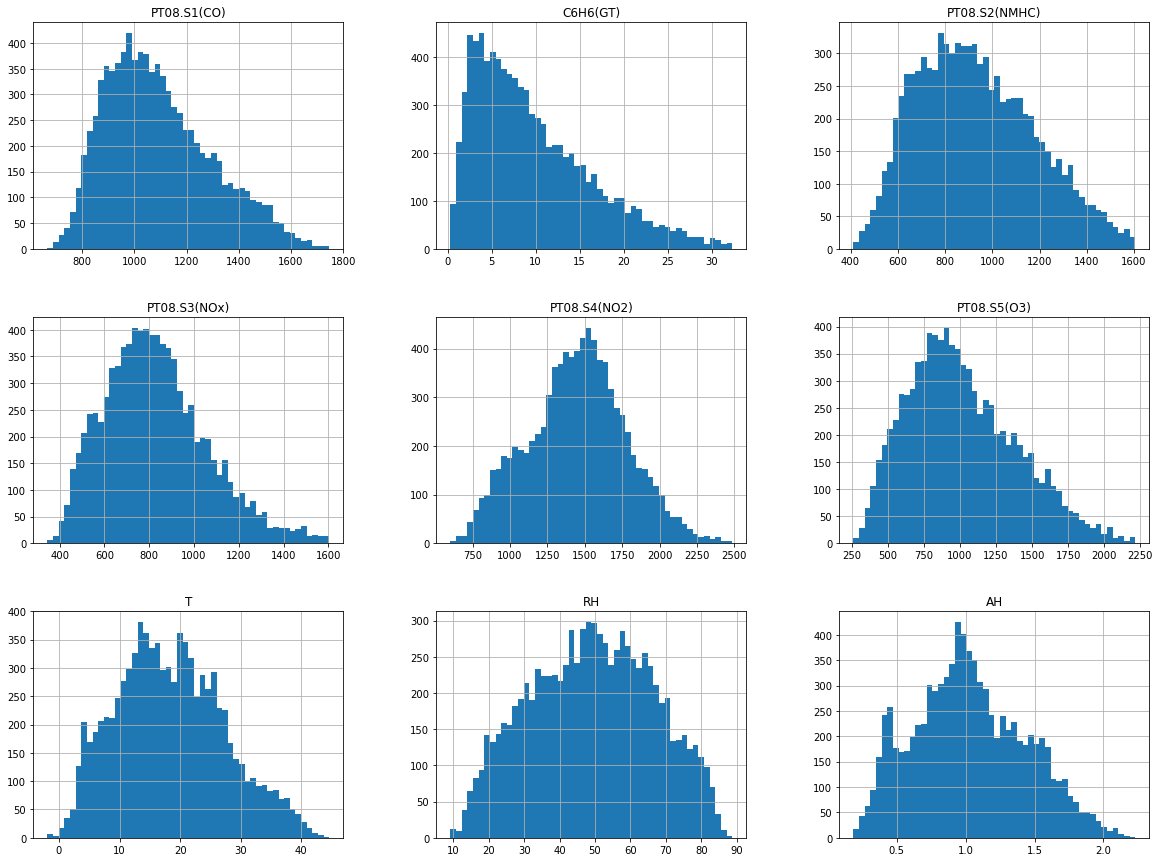

In [19]:
#Histogram of each attribute
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

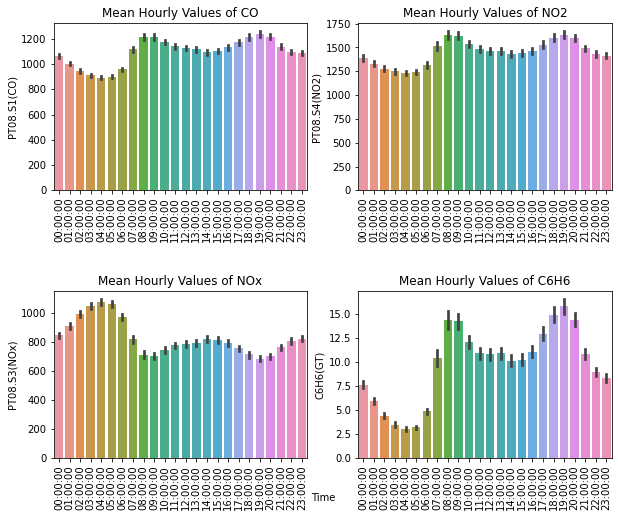

In [20]:
#Bar charts
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.6)

# Mean hourly value of CO
sns.barplot(x='Time',y='PT08.S1(CO)', data=air_df.sort_values('Time'), ax=axes[0, 0])
axes[0, 0].set_title('Mean Hourly Values of CO')
axes[0, 0].set_xlabel(None)
axes[0, 0].tick_params(axis='x', labelrotation=90)

# Mean hourly value of NO2
sns.barplot(x='Time',y='PT08.S4(NO2)', data=air_df.sort_values('Time'), ax=axes[0, 1])
axes[0, 1].set_title('Mean Hourly Values of NO2')
axes[0, 1].set_xlabel(None)
axes[0, 1].tick_params(axis='x', labelrotation=90)

# Mean hourly value of NOx
sns.barplot(x='Time',y='PT08.S3(NOx)', data=air_df.sort_values('Time'), ax=axes[1, 0])
axes[1, 0].set_title('Mean Hourly Values of NOx')
axes[1, 0].set_xlabel(None)
axes[1, 0].tick_params(axis='x', labelrotation=90)

# Mean hourly value of C6H6
sns.barplot(x='Time',y='C6H6(GT)', data=air_df.sort_values('Time'), ax=axes[1, 1])
axes[1, 1].set_title('Mean Hourly Values of C6H6')
axes[1, 1].set_xlabel(None)
axes[1, 1].tick_params(axis='x', labelrotation=90)

# Add a common x-label
fig.text(0.5, 0.05, 'Time', ha='center')

plt.show()


The peak concentration of CO,NO2 and C6H6 in the city are between 8 AM and 9 AM and between 6 PM and 8 PM, beginnings and endings of office hours, respectively. While concentration level of NOx is high in the evening between 9 PM and 11 PM

In [21]:
#Correlation matrix
cor_matrix=air_df.corr().round(decimals=1)
cor_matrix

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.0,0.9,0.9,-0.8,0.6,0.9,0.0,0.1,0.1
C6H6(GT),0.9,1.0,1.0,-0.8,0.7,0.9,0.2,-0.1,0.2
PT08.S2(NMHC),0.9,1.0,1.0,-0.8,0.8,0.9,0.2,-0.1,0.2
PT08.S3(NOx),-0.8,-0.8,-0.8,1.0,-0.5,-0.8,-0.1,-0.1,-0.2
PT08.S4(NO2),0.6,0.7,0.8,-0.5,1.0,0.5,0.6,-0.0,0.6
PT08.S5(O3),0.9,0.9,0.9,-0.8,0.5,1.0,-0.0,0.1,0.0
T,0.0,0.2,0.2,-0.1,0.6,-0.0,1.0,-0.6,0.7
RH,0.1,-0.1,-0.1,-0.1,-0.0,0.1,-0.6,1.0,0.2
AH,0.1,0.2,0.2,-0.2,0.6,0.0,0.7,0.2,1.0


<AxesSubplot:>

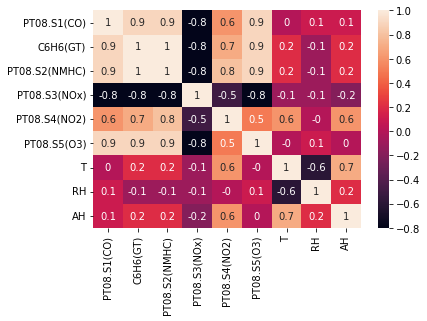

In [22]:
#We can visualize this correlation matrix - Heat map
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

# III) MULTIPLE REGRESSION MODEL

In [23]:
air_df = air_df.drop(['Date', 'Time'], axis=1)
air_df

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.00,11.881723,1045.50,1056.25,1692.00,1267.50,13.600,48.875001,0.757754
1,1292.25,9.397165,954.75,1173.75,1558.75,972.25,13.300,47.700000,0.725487
2,1402.00,8.997817,939.25,1140.00,1554.50,1074.00,11.900,53.975000,0.750239
3,1375.50,9.228796,948.25,1092.00,1583.75,1203.25,11.000,60.000000,0.786713
4,1272.25,6.518224,835.50,1205.00,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...
8729,1314.25,13.529605,1101.25,538.50,1374.25,1728.50,21.850,29.250000,0.756824
8730,1162.50,11.355157,1027.00,603.75,1263.50,1269.00,24.325,23.725000,0.711864
8731,1142.00,12.374538,1062.50,603.25,1240.75,1092.00,26.900,18.350000,0.640649
8732,1002.50,9.547187,960.50,701.50,1041.00,769.75,28.325,13.550000,0.513866


In [24]:
#Set up independent variables and dependent variable
X = pd.DataFrame(air_df.iloc[:,1:]) 
y = pd.DataFrame(air_df.iloc[:,0]) 

In [25]:
#Check our Xs'data
X.head(n=5)

,C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,11.881723,1045.50,1056.25,1692.00,1267.50,13.60,48.875001,0.757754
1,9.397165,954.75,1173.75,1558.75,972.25,13.30,47.700000,0.725487
2,8.997817,939.25,1140.00,1554.50,1074.00,11.90,53.975000,0.750239
3,9.228796,948.25,1092.00,1583.75,1203.25,11.00,60.000000,0.786713
4,6.518224,835.50,1205.00,1490.00,1110.00,11.15,59.575001,0.788794


In [26]:
#Check y data
y.head(n=5)

,PT08.S1(CO)
0,1360.00
1,1292.25
2,1402.00
3,1375.50
4,1272.25


In [27]:
#Split data into train and test data sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [28]:
#Shape of train and test sets
print("X Train shape ", X_train.shape)
print("X Test shape  ", X_test.shape)
print("y Train shape ", y_train.shape)
print("y Test shape  ", y_test.shape)

X Train shape  (6987, 8)
X Test shape   (1747, 8)
y Train shape  (6987, 1)
y Test shape   (1747, 1)


# Train a multiple linear regression model

In [29]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
regressor.coef_

array([[ 8.00503353e+00, -6.71416379e-02, -2.06223354e-01,
         2.11854969e-01,  1.90562079e-01,  1.31388560e-01,
         1.42226122e+00, -1.11524022e+02]])

In [31]:
v = pd.DataFrame(regressor.coef_, index = ["Co-efficient"]).transpose()
w = pd.DataFrame(X.columns,columns = ['Attribute'])

# Review the Regression coefficients

In [32]:
coeff_df = pd.concat([w,v], axis = 1, join = 'inner')
coeff_df

,Attribute,Co-efficient
0,C6H6(GT),8.005034
1,PT08.S2(NMHC),-0.067142
2,PT08.S3(NOx),-0.206223
3,PT08.S4(NO2),0.211855
4,PT08.S5(O3),0.190562
5,T,0.131389
6,RH,1.422261
7,AH,-111.524022


In [33]:
#Compare Predicted Value with Actuals 
y_test.head(n=10)

,PT08.S1(CO)
5481,852.00
7890,946.75
3480,1016.25
5281,1327.75
5826,1099.50
1669,972.50
3667,946.50
6015,877.75
5247,1075.50
7258,789.75


In [34]:
y_pred  = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred.head(n=10)

,Predicted
0,902.332010
1,931.617882
2,964.642214
3,1358.529259
4,1148.587648
5,1009.785045
6,885.868795
7,820.945797
8,1136.254941
9,739.512503


# Evaluate the model

In [35]:
from sklearn import metrics 
import numpy as np
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared  Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R Squared", metrics.r2_score(y_test,y_pred))

Mean Absolute Error 59.2548270364719
Mean Squared Error 5714.895366487657
Root Mean Squared  Error 75.59692696457745
R Squared 0.8585783216431604


# USING OLS from stats model

In [36]:
import statsmodels.api as sm

In [37]:
ols_model = sm.OLS(y_train,X_train)
ols_results = ols_model.fit()

In [38]:
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            PT08.S1(CO)   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.709e+05
Date:                Mon, 17 Apr 2023   Prob (F-statistic):                        0.00
Time:                        11:03:26   Log-Likelihood:                         -40472.
No. Observations:                6987   AIC:                                  8.096e+04
Df Residuals:                    6979   BIC:                                  8.101e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# MUTUAL INFORMATION

In [39]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X, y, discrete_features=X.dtypes == np.int32)
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

C:\Users\ngochuyen\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PT08.S3(NOx)     0.821860
PT08.S5(O3)      0.777093
PT08.S2(NMHC)    0.753689
C6H6(GT)         0.750133
PT08.S4(NO2)     0.413588
T                0.055312
AH               0.053847
RH               0.033313
dtype: float64

# Observation from above

In the above mutual information scores, we can see that PT08.S3(NOx), PT08.S5(O3), PT08.S2(NMHC) and C6H6(GT) have a significant impact on the Y variable 
PT08.S1(CO).